通过pandas官网[10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)入门pandas

## 模块导入

In [1]:
import numpy as np
import pandas as pd

## 创建对象
常用的对象有两种，分别是`Series`和`DataFrame`  

通过传递一个值的列表来创建`Series`对象，采用默认的整数索引

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s # 第一列是索引，第二列是数值

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

通过传递一个numpy数组来创建`DataFrame`对象，包含时间索引和带有标签的列

In [3]:
dates = pd.date_range('20130101', periods = 6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index = dates, columns = list(['A', 'B', 'C', 'D']))

In [5]:
df

,A,B,C,D
2013-01-01,-0.366998,-0.256354,-1.023432,1.056008
2013-01-02,0.141107,-0.647175,-0.044398,0.672114
2013-01-03,0.392378,-1.488349,0.334395,-2.492540
2013-01-04,0.798026,0.570123,-1.144306,-1.821400
2013-01-05,-0.638108,0.355190,0.434440,-0.447849
2013-01-06,-1.316475,0.384291,0.271073,0.924126


传递一个可以转换成类似series的字典对象可以创建一个DataFrame

In [6]:
import pandas as pd
import numpy as np
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index = range(1, 5), dtype = 'float32'),
                    'D': np.array([3] * 4, dtype = 'int32'),
                    'E': pd.Categorical(['test', 'train', 'test', 'train']),
                    'F': 'foo'})

In [7]:
df2

,A,B,C,D,E,F
1,1.0,2013-01-02,1.0,3,test,foo
2,1.0,2013-01-02,1.0,3,train,foo
3,1.0,2013-01-02,1.0,3,test,foo
4,1.0,2013-01-02,1.0,3,train,foo


df2的各列的数据类型不同

In [8]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## 查询数据
这里演示了如何查询DataFrame对象的顶行和底行

In [9]:
df.head()

,A,B,C,D
2013-01-01,-0.366998,-0.256354,-1.023432,1.056008
2013-01-02,0.141107,-0.647175,-0.044398,0.672114
2013-01-03,0.392378,-1.488349,0.334395,-2.492540
2013-01-04,0.798026,0.570123,-1.144306,-1.821400
2013-01-05,-0.638108,0.355190,0.434440,-0.447849


In [10]:
df.tail(3)

,A,B,C,D
2013-01-04,0.798026,0.570123,-1.144306,-1.821400
2013-01-05,-0.638108,0.355190,0.434440,-0.447849
2013-01-06,-1.316475,0.384291,0.271073,0.924126


查询索引和列

In [11]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [12]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

`DataFrame.to_numpy()`可以将df对象转变成Numpy表示，但是如果df的各列的数据类型不同，那么这个操作会耗费大量的时间和资源，这就涉及到了pandas和numpy的基本区别：整个numpy数组的数据类型是相同的，而pandas df的每行拥有各自的数据类型。当调用`DataFrame.to_numpy()`时，pandas将会找到一个能够将df的所有数据类型都涵盖的数据类型，通常是`object`，即会将每个值都转换成python对象

In [13]:
df.to_numpy()

array([[-0.36699769, -0.25635424, -1.02343187,  1.05600802],
       [ 0.14110718, -0.64717538, -0.04439754,  0.67211431],
       [ 0.39237755, -1.48834924,  0.33439499, -2.49254017],
       [ 0.79802609,  0.57012263, -1.14430581, -1.82140029],
       [-0.63810817,  0.3551895 ,  0.43444021, -0.44784858],
       [-1.31647531,  0.38429126,  0.27107272,  0.92412641]])

`describe`展示数据的统计学总结

In [14]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.165012,-0.180379,-0.195371,-0.351590
std,0.764503,0.787832,0.707649,1.510631
min,-1.316475,-1.488349,-1.144306,-2.492540
25%,-0.570331,-0.549470,-0.778673,-1.478012
50%,-0.112945,0.049418,0.113338,0.112133
75%,0.329560,0.377016,0.318564,0.861123
max,0.798026,0.570123,0.434440,1.056008


转置：

In [15]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.366998,0.141107,0.392378,0.798026,-0.638108,-1.316475
B,-0.256354,-0.647175,-1.488349,0.570123,0.355190,0.384291
C,-1.023432,-0.044398,0.334395,-1.144306,0.434440,0.271073
D,1.056008,0.672114,-2.492540,-1.821400,-0.447849,0.924126


按照轴排序：

In [16]:
df.sort_index(axis = 1, ascending = False)

,D,C,B,A
2013-01-01,1.056008,-1.023432,-0.256354,-0.366998
2013-01-02,0.672114,-0.044398,-0.647175,0.141107
2013-01-03,-2.492540,0.334395,-1.488349,0.392378
2013-01-04,-1.821400,-1.144306,0.570123,0.798026
2013-01-05,-0.447849,0.434440,0.355190,-0.638108
2013-01-06,0.924126,0.271073,0.384291,-1.316475


通过值排序：

In [17]:
df.sort_values(by = 'B')

,A,B,C,D
2013-01-03,0.392378,-1.488349,0.334395,-2.492540
2013-01-02,0.141107,-0.647175,-0.044398,0.672114
2013-01-01,-0.366998,-0.256354,-1.023432,1.056008
2013-01-05,-0.638108,0.355190,0.434440,-0.447849
2013-01-06,-1.316475,0.384291,0.271073,0.924126
2013-01-04,0.798026,0.570123,-1.144306,-1.821400


## 选择

### 获取数据
选择一列，得到一个`Series`对象，这个操作等价于`df.A`

In [18]:
df['A']

2013-01-01   -0.366998
2013-01-02    0.141107
2013-01-03    0.392378
2013-01-04    0.798026
2013-01-05   -0.638108
2013-01-06   -1.316475
Freq: D, Name: A, dtype: float64

通过[]将行进行切片操作

In [19]:
df[0: 3]

,A,B,C,D
2013-01-01,-0.366998,-0.256354,-1.023432,1.056008
2013-01-02,0.141107,-0.647175,-0.044398,0.672114
2013-01-03,0.392378,-1.488349,0.334395,-2.492540


In [20]:
df['20130102': '20130104'] # 包括末端

,A,B,C,D
2013-01-02,0.141107,-0.647175,-0.044398,0.672114
2013-01-03,0.392378,-1.488349,0.334395,-2.492540
2013-01-04,0.798026,0.570123,-1.144306,-1.821400


### 通过标签选择数据

使用标签获取数据

In [21]:
df.loc[dates[0]]

A   -0.366998
B   -0.256354
C   -1.023432
D    1.056008
Name: 2013-01-01 00:00:00, dtype: float64

使用标签获取多个轴

In [22]:
df.loc[:, 'A': 'D']

,A,B,C,D
2013-01-01,-0.366998,-0.256354,-1.023432,1.056008
2013-01-02,0.141107,-0.647175,-0.044398,0.672114
2013-01-03,0.392378,-1.488349,0.334395,-2.492540
2013-01-04,0.798026,0.570123,-1.144306,-1.821400
2013-01-05,-0.638108,0.355190,0.434440,-0.447849
2013-01-06,-1.316475,0.384291,0.271073,0.924126


显示标签切片，包括两个末端

In [23]:
df.loc['20130102': '20130104', ['A', 'B']]

,A,B
2013-01-02,0.141107,-0.647175
2013-01-03,0.392378,-1.488349
2013-01-04,0.798026,0.570123


减少返回对象的维度

In [24]:
df.loc['20130102', ['A', 'B']]

A    0.141107
B   -0.647175
Name: 2013-01-02 00:00:00, dtype: float64

返回一个标量值

In [25]:
df.loc[dates[0], 'A']

-0.36699769147921896

`DataFrame.at`可以更快的取得一个标量值

In [26]:
df.at[dates[0], 'A']

-0.36699769147921896

### 通过位置取值

通过传递位置取值

In [27]:
df.iloc[3]

A    0.798026
B    0.570123
C   -1.144306
D   -1.821400
Name: 2013-01-04 00:00:00, dtype: float64

整数切片的方式和numpy/python类似

In [28]:
df.iloc[3: 5, 0: 2]

,A,B
2013-01-04,0.798026,0.570123
2013-01-05,-0.638108,0.355190


也可以传入位置的列表，这也和numpy/python类似

In [29]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,0.141107,-0.044398
2013-01-03,0.392378,0.334395
2013-01-05,-0.638108,0.434440


直接获取一个值

In [30]:
df.iloc[1, 1]

-0.6471753780767515

`DataFrame.iat`可以更快点的获取一个标量值

In [31]:
df.iat[1, 1]

-0.6471753780767515

### 布尔值索引

使用一个单独的列值来选择数据

In [32]:
df[df.A > 0]

,A,B,C,D
2013-01-02,0.141107,-0.647175,-0.044398,0.672114
2013-01-03,0.392378,-1.488349,0.334395,-2.492540
2013-01-04,0.798026,0.570123,-1.144306,-1.821400


从DataFrame中选择满足布尔条件的值

In [33]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,NaN,1.056008
2013-01-02,0.141107,NaN,NaN,0.672114
2013-01-03,0.392378,NaN,0.334395,NaN
2013-01-04,0.798026,0.570123,NaN,NaN
2013-01-05,NaN,0.355190,0.434440,NaN
2013-01-06,NaN,0.384291,0.271073,0.924126


使用`isin()`方法过滤

In [34]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,-0.366998,-0.256354,-1.023432,1.056008,one
2013-01-02,0.141107,-0.647175,-0.044398,0.672114,one
2013-01-03,0.392378,-1.488349,0.334395,-2.492540,two
2013-01-04,0.798026,0.570123,-1.144306,-1.821400,three
2013-01-05,-0.638108,0.355190,0.434440,-0.447849,four
2013-01-06,-1.316475,0.384291,0.271073,0.924126,three


In [35]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,0.392378,-1.488349,0.334395,-2.492540,two
2013-01-05,-0.638108,0.355190,0.434440,-0.447849,four


### 设置
通过索引将新列自动对齐数据

In [36]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index = pd.date_range('20130102', periods = 6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [37]:
df['F'] = s1

通过标签设置值

In [38]:
df.at[dates[0], 'A'] = 0

通过位置设定值

In [39]:
df.iat[0, 1] = 0

通过Numpy数组赋值来设定

In [40]:
df.loc[:, 'D'] = np.array([5] * len(df))

In [41]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.023432,5,NaN
2013-01-02,0.141107,-0.647175,-0.044398,5,1.0
2013-01-03,0.392378,-1.488349,0.334395,5,2.0
2013-01-04,0.798026,0.570123,-1.144306,5,3.0
2013-01-05,-0.638108,0.355190,0.434440,5,4.0
2013-01-06,-1.316475,0.384291,0.271073,5,5.0


In [42]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.023432,-5,NaN
2013-01-02,-0.141107,-0.647175,-0.044398,-5,-1.0
2013-01-03,-0.392378,-1.488349,-0.334395,-5,-2.0
2013-01-04,-0.798026,-0.570123,-1.144306,-5,-3.0
2013-01-05,-0.638108,-0.355190,-0.434440,-5,-4.0
2013-01-06,-1.316475,-0.384291,-0.271073,-5,-5.0


## 缺失值

pandas默认使用`np.nan`代表缺失值  
`reindex`允许我们对于特定轴的索引进行增/删/改，返回数据的copy

In [43]:
print(df)
df1 = df.reindex(index = dates[0: 4], columns = list(df.columns) + ['E'])
df1.loc[dates[0]: dates[1], 'E'] = 1
df1

                   A         B         C  D    F
2013-01-01  0.000000  0.000000 -1.023432  5  NaN
2013-01-02  0.141107 -0.647175 -0.044398  5  1.0
2013-01-03  0.392378 -1.488349  0.334395  5  2.0
2013-01-04  0.798026  0.570123 -1.144306  5  3.0
2013-01-05 -0.638108  0.355190  0.434440  5  4.0
2013-01-06 -1.316475  0.384291  0.271073  5  5.0


,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.023432,5,NaN,1.0
2013-01-02,0.141107,-0.647175,-0.044398,5,1.0,1.0
2013-01-03,0.392378,-1.488349,0.334395,5,2.0,NaN
2013-01-04,0.798026,0.570123,-1.144306,5,3.0,NaN


丢弃含有缺失值的行

In [44]:
df1.dropna(how = 'any')

,A,B,C,D,F,E
2013-01-02,0.141107,-0.647175,-0.044398,5,1.0,1.0


填补缺失值：

In [45]:
df1.fillna(value = 5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.023432,5,5.0,1.0
2013-01-02,0.141107,-0.647175,-0.044398,5,1.0,1.0
2013-01-03,0.392378,-1.488349,0.334395,5,2.0,5.0
2013-01-04,0.798026,0.570123,-1.144306,5,3.0,5.0


得到值为nan的布尔值掩膜：

In [46]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## 操作

### 统计值

一般排除缺失值后的操作  
实现描述性的统计：

In [47]:
print(df)
df.mean()

                   A         B         C  D    F
2013-01-01  0.000000  0.000000 -1.023432  5  NaN
2013-01-02  0.141107 -0.647175 -0.044398  5  1.0
2013-01-03  0.392378 -1.488349  0.334395  5  2.0
2013-01-04  0.798026  0.570123 -1.144306  5  3.0
2013-01-05 -0.638108  0.355190  0.434440  5  4.0
2013-01-06 -1.316475  0.384291  0.271073  5  5.0


A   -0.103845
B   -0.137654
C   -0.195371
D    5.000000
F    3.000000
dtype: float64

在另一个轴上相同操作：

In [48]:
df.mean(1)

2013-01-01    0.994142
2013-01-02    1.089907
2013-01-03    1.247685
2013-01-04    1.644769
2013-01-05    1.830304
2013-01-06    1.867778
Freq: D, dtype: float64

操作不同维度的对象时需要对齐。另外，pandas将会自动沿着特定的维度进行广播

In [49]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index = dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [50]:
df.sub(s, axis = 'index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.607622,-2.488349,-0.665605,4.0,1.0
2013-01-04,-2.201974,-2.429877,-4.144306,2.0,0.0
2013-01-05,-5.638108,-4.644810,-4.565560,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

对数据进行`apply`函数操作

In [51]:
print(df)
df.apply(np.cumsum)

                   A         B         C  D    F
2013-01-01  0.000000  0.000000 -1.023432  5  NaN
2013-01-02  0.141107 -0.647175 -0.044398  5  1.0
2013-01-03  0.392378 -1.488349  0.334395  5  2.0
2013-01-04  0.798026  0.570123 -1.144306  5  3.0
2013-01-05 -0.638108  0.355190  0.434440  5  4.0
2013-01-06 -1.316475  0.384291  0.271073  5  5.0


,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.023432,5,NaN
2013-01-02,0.141107,-0.647175,-1.067829,10,1.0
2013-01-03,0.533485,-2.135525,-0.733434,15,3.0
2013-01-04,1.331511,-1.565402,-1.877740,20,6.0
2013-01-05,0.693403,-1.210212,-1.443300,25,10.0
2013-01-06,-0.623073,-0.825921,-1.172227,30,15.0


In [52]:
df.apply(lambda x: x.max() - x.min())

A    2.114501
B    2.058472
C    1.578746
D    0.000000
F    4.000000
dtype: float64

## 字符串方法

`Series`对象的`str`属性里含有一系列字符串处理方法，可以方便地对数组中的每个元素进行操作

In [53]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## 合并

### 联结

pandas提供了各种工具，可以在连接/合并类型操作的情况下，轻松地将`Series`和`DataFrame`对象与索引和关系代数功能的各种设置逻辑组合在一起。

用`concat()`连接pandas对象

In [54]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,1.028207,0.803524,-0.661257,-0.102669
1,0.560978,-1.160942,1.342034,-1.705082
2,-0.411435,0.714888,1.793080,-0.257939
3,0.502980,0.015347,0.044582,-0.318702
4,2.355716,0.348774,0.146689,-0.323673
5,-0.464718,1.497614,0.463114,0.490205
6,0.398055,0.499535,-0.606688,0.793922
7,-0.063219,0.416612,0.482459,-0.407300
8,0.183794,2.614266,0.646405,-1.573571
9,-0.632818,-0.604623,0.448057,0.090261


In [55]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,1.028207,0.803524,-0.661257,-0.102669
1,0.560978,-1.160942,1.342034,-1.705082
2,-0.411435,0.714888,1.793080,-0.257939
3,0.502980,0.015347,0.044582,-0.318702
4,2.355716,0.348774,0.146689,-0.323673
5,-0.464718,1.497614,0.463114,0.490205
6,0.398055,0.499535,-0.606688,0.793922
7,-0.063219,0.416612,0.482459,-0.407300
8,0.183794,2.614266,0.646405,-1.573571
9,-0.632818,-0.604623,0.448057,0.090261


### Join

SQL风格的合并

In [56]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [57]:
left

,key,lval
0,foo,1
1,foo,2


In [58]:
right

,key,rval
0,foo,4
1,foo,5


In [59]:
pd.merge(left, right, on = 'key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


另一个例子

In [60]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [61]:
left

,key,lval
0,foo,1
1,bar,2


In [62]:
right

,key,rval
0,foo,4
1,bar,5


In [63]:
pd.merge(left, right, on = 'key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### 增加

将行添加到`dataframe`

In [64]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,-0.041030,-0.402993,-1.486563,0.181034
1,0.867362,-1.220889,-0.022355,0.705356
2,-0.336013,0.475488,0.986214,0.692695
3,0.881663,1.488623,-0.275843,2.023437
4,-0.983285,1.057781,-2.129181,-0.999100
5,0.695277,-0.234355,-0.395157,-0.115949
6,-2.079407,0.382328,-2.340577,0.589447
7,1.071758,0.500278,-0.254757,-0.057241


In [65]:
s = df.iloc[3]

In [66]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.041030,-0.402993,-1.486563,0.181034
1,0.867362,-1.220889,-0.022355,0.705356
2,-0.336013,0.475488,0.986214,0.692695
3,0.881663,1.488623,-0.275843,2.023437
4,-0.983285,1.057781,-2.129181,-0.999100
5,0.695277,-0.234355,-0.395157,-0.115949
6,-2.079407,0.382328,-2.340577,0.589447
7,1.071758,0.500278,-0.254757,-0.057241
8,0.881663,1.488623,-0.275843,2.023437


## 分组

通过分组，我们指的是包含一个或更多以下步骤的过程：  
- 通过一些判据将数据分割成组
- 对每个组独立地应用函数
- 将这些结果组合成一个数据结构

In [67]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.760804,-1.457404
1,bar,one,0.110704,0.787737
2,foo,two,0.619313,-0.483603
3,bar,three,0.244641,-2.594662
4,foo,two,0.149760,-0.652728
5,bar,two,0.604394,1.278679
6,foo,one,2.241680,1.494910
7,foo,three,-0.180411,-0.747899


将数据分组并对生成地组应用`sum()`函数

In [68]:
df.groupby('A').sum()

,C,D
A,,
bar,0.959738,-0.528245
foo,3.591146,-1.846723


依照多个列进行分组可以形成一个多级索引，然后再使用`sum()`函数

In [69]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.110704  0.787737
    three  0.244641 -2.594662
    two    0.604394  1.278679
foo one    3.002484  0.037507
    three -0.180411 -0.747899
    two    0.769073 -1.136331

## 改变形状

### 堆积(stack)

In [70]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'quz', 'quz'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('quz', 'one'),
 ('quz', 'two')]

In [71]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.694370 -1.781960
      two     0.259174  0.920410
baz   one     2.005320 -1.950594
      two    -0.715648 -1.044479

`stack()`方法会压缩列中的级别

In [72]:
stacked = df2.stack()

In [73]:
stacked

first  second   
bar    one     A   -0.694370
               B   -1.781960
       two     A    0.259174
               B    0.920410
baz    one     A    2.005320
               B   -1.950594
       two     A   -0.715648
               B   -1.044479
dtype: float64

对于一个已经堆积的Dataframe或者Series(索引为多重索引)，`stack()`的相反操作是`unstack()`，默认是最后一个等级

In [74]:
stacked.unstack()

A         B
first second                    
bar   one    -0.694370 -1.781960
      two     0.259174  0.920410
baz   one     2.005320 -1.950594
      two    -0.715648 -1.044479

In [75]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.694370  0.259174
      B -1.781960  0.920410
baz   A  2.005320 -0.715648
      B -1.950594 -1.044479

In [76]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.694370  2.005320
       B -1.781960 -1.950594
two    A  0.259174 -0.715648
       B  0.920410 -1.044479

## 数据透视表(pivot tables)

In [77]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,0.207163,-0.695172
1,one,B,foo,-0.228331,-0.936777
2,two,C,foo,-0.456668,0.163467
3,three,A,bar,-2.592719,-0.561136
4,one,B,bar,0.892447,-0.547367
5,one,C,bar,0.281665,-1.640259
6,two,A,foo,-0.031809,-0.357394
7,three,B,foo,0.675682,0.241408
8,one,C,foo,0.700309,1.392539
9,one,A,bar,-0.643732,-0.157696


我们可以很容易地从这个数据中制作数据透视表

In [78]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.643732  0.207163
      B  0.892447 -0.228331
      C  0.281665  0.700309
three A -2.592719       NaN
      B       NaN  0.675682
      C -0.311811       NaN
two   A       NaN -0.031809
      B  0.515082       NaN
      C       NaN -0.456668

## 时间序列

In [79]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5S').sum()

2012-01-01 00:00:00    1116
2012-01-01 00:00:05     932
2012-01-01 00:00:10     907
2012-01-01 00:00:15     483
2012-01-01 00:00:20    1189
2012-01-01 00:00:25    1546
2012-01-01 00:00:30     954
2012-01-01 00:00:35    1488
2012-01-01 00:00:40    1611
2012-01-01 00:00:45    1409
2012-01-01 00:00:50    1181
2012-01-01 00:00:55    1043
2012-01-01 00:01:00    1108
2012-01-01 00:01:05    1374
2012-01-01 00:01:10    1760
2012-01-01 00:01:15    1551
2012-01-01 00:01:20    1512
2012-01-01 00:01:25    1148
2012-01-01 00:01:30    1048
2012-01-01 00:01:35    1628
Freq: 5S, dtype: int32

时区表示

In [80]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    0.469125
2012-03-07    2.241744
2012-03-08   -0.437242
2012-03-09    0.346739
2012-03-10   -1.087374
Freq: D, dtype: float64

In [81]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    0.469125
2012-03-07 00:00:00+00:00    2.241744
2012-03-08 00:00:00+00:00   -0.437242
2012-03-09 00:00:00+00:00    0.346739
2012-03-10 00:00:00+00:00   -1.087374
Freq: D, dtype: float64

转换成另一个时区

In [82]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.469125
2012-03-06 19:00:00-05:00    2.241744
2012-03-07 19:00:00-05:00   -0.437242
2012-03-08 19:00:00-05:00    0.346739
2012-03-09 19:00:00-05:00   -1.087374
Freq: D, dtype: float64

时间跨度表示之间地转换

In [83]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.753966
2012-02-29    0.198875
2012-03-31   -0.042162
2012-04-30   -0.798732
2012-05-31    1.124486
Freq: M, dtype: float64

In [84]:
ps = ts.to_period()

In [85]:
ps

2012-01   -0.753966
2012-02    0.198875
2012-03   -0.042162
2012-04   -0.798732
2012-05    1.124486
Freq: M, dtype: float64

In [86]:
ps.to_timestamp()

2012-01-01   -0.753966
2012-02-01    0.198875
2012-03-01   -0.042162
2012-04-01   -0.798732
2012-05-01    1.124486
Freq: MS, dtype: float64

period和timestamp之间地转换使我们可以使用一些便捷的算数函数

In [87]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00    0.468970
1990-06-01 09:00    0.401224
1990-09-01 09:00    1.285421
1990-12-01 09:00    0.066415
1991-03-01 09:00   -1.907468
Freq: H, dtype: float64

## 分类

pandas在`DataFrame`中包含了分类数据

In [88]:
df = pd.DataFrame({'id': [1, 2, 3, 4, 5, 6],
                   'raw_grade': ['a', 'b', 'b', 'a', 'a', 'e']})

将原始等级转变为分类数据类型

In [89]:
df['grade'] = df['raw_grade'].astype('category')
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

将类别名命名为有实际意义的名字(对`Series.cat.categories`复制)

In [90]:
df['grade'].cat.categories = ['very good', 'good', 'very bad']
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

添加丢失的类别

In [91]:
df['grade'] = df['grade'].cat.set_categories(['very bad', 'bad', 'medium',
                                              'good', 'very good'])
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

按照类别中的每个顺序排序而不是字典序

In [92]:
df.sort_values(by='grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [93]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


通过类别行进行分组也会展示空的类别

In [94]:
df.groupby('grade').size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## 作图

In [95]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
print(ts)
ts.plot() 

2000-01-01     0.428686
2000-01-02     1.980679
2000-01-03     1.401584
2000-01-04     3.407387
2000-01-05     3.510505
2000-01-06     5.289564
2000-01-07     4.673290
2000-01-08     4.738492
2000-01-09     4.601498
2000-01-10     6.066140
2000-01-11     6.434122
2000-01-12     5.839356
2000-01-13     3.049763
2000-01-14     4.093403
2000-01-15     4.170754
2000-01-16     5.340334
2000-01-17     5.390593
2000-01-18     5.959148
2000-01-19     5.234851
2000-01-20     3.216860
2000-01-21     2.471324
2000-01-22     2.138012
2000-01-23     1.723897
2000-01-24     1.714974
2000-01-25     1.291100
2000-01-26     1.181293
2000-01-27     2.377167
2000-01-28     2.205242
2000-01-29     3.563986
2000-01-30     3.007473
                ...    
2002-08-28    12.954755
2002-08-29    12.209496
2002-08-30    12.663725
2002-08-31    11.955453
2002-09-01    12.257579
2002-09-02    12.554032
2002-09-03    14.031217
2002-09-04    13.699061
2002-09-05    15.017948
2002-09-06    16.023711
2002-09-07    16

对于一个DataFrame，`plot()`方法可以方便地绘出标签的所有列

In [96]:
import matplotlib.pyplot as plt
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

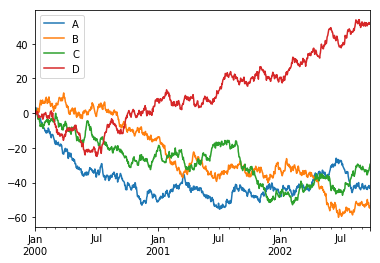

In [97]:
df.plot()

No handles with labels found to put in legend.


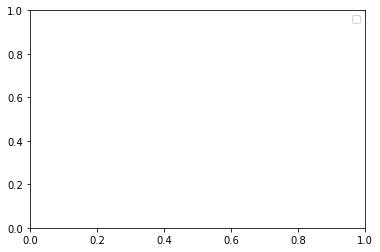

In [98]:
plt.legend(loc='best')

## 数据输入输出

### CSV

写入一个csv文件

In [99]:
df.to_csv('foo.csv')

读取一个csv文件

In [100]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.980166,0.356267,1.932149,0.581695
1,2000-01-02,3.111071,0.980661,2.277735,1.469538
2,2000-01-03,3.174466,-0.040350,-0.152260,1.002539
3,2000-01-04,2.386907,-0.366053,1.028859,-0.648253
4,2000-01-05,1.500552,0.896409,0.729501,-0.366594
5,2000-01-06,0.725001,0.897210,-0.067498,0.471997
6,2000-01-07,0.364917,1.451603,-0.106889,-0.177656
7,2000-01-08,-1.557044,2.792638,-1.702109,0.797752
8,2000-01-09,-2.321915,2.474103,-3.180668,-0.124792
9,2000-01-10,-3.092698,0.542164,-3.592944,-1.663752


### Excel

对Excel文件进行读写

写入excel文件

In [101]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

读取excel文件

In [102]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.980166,0.356267,1.932149,0.581695
1,2000-01-02,3.111071,0.980661,2.277735,1.469538
2,2000-01-03,3.174466,-0.040350,-0.152260,1.002539
3,2000-01-04,2.386907,-0.366053,1.028859,-0.648253
4,2000-01-05,1.500552,0.896409,0.729501,-0.366594
5,2000-01-06,0.725001,0.897210,-0.067498,0.471997
6,2000-01-07,0.364917,1.451603,-0.106889,-0.177656
7,2000-01-08,-1.557044,2.792638,-1.702109,0.797752
8,2000-01-09,-2.321915,2.474103,-3.180668,-0.124792
9,2000-01-10,-3.092698,0.542164,-3.592944,-1.663752
